In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PROCESSED training data
df = pd.read_csv('../data/processed/train_data.csv')

print(f"Training Rows: {df.shape[0]}")
print(f"Training Columns: {df.shape[1]}")

# 1. Check for NaNs
# We expect 0 NaNs. If you see any, feature_engineering.py has a bug.
print("\nMissing Values:")
print(df.isnull().sum())

# 2. Check Weights
# You should see values like 1.0, 0.8, 0.64...
print("\nUnique Weights found:")
print(df['sample_weight'].unique())

Training Rows: 277041
Training Columns: 15

Missing Values:
match_id              0
venue                 0
batting_team          0
bowling_team          0
innings               0
ball                  0
legal_balls_bowled    0
wickets_left          0
balls_left            0
current_score         0
crr                   0
runs_last_5           0
wickets_last_5        0
sample_weight         0
final_score           0
dtype: int64

Unique Weights found:
[0.1        0.10737418 0.13421773 0.16777216 0.2097152  0.262144
 0.32768    0.4096     0.512      0.64       0.8        1.        ]


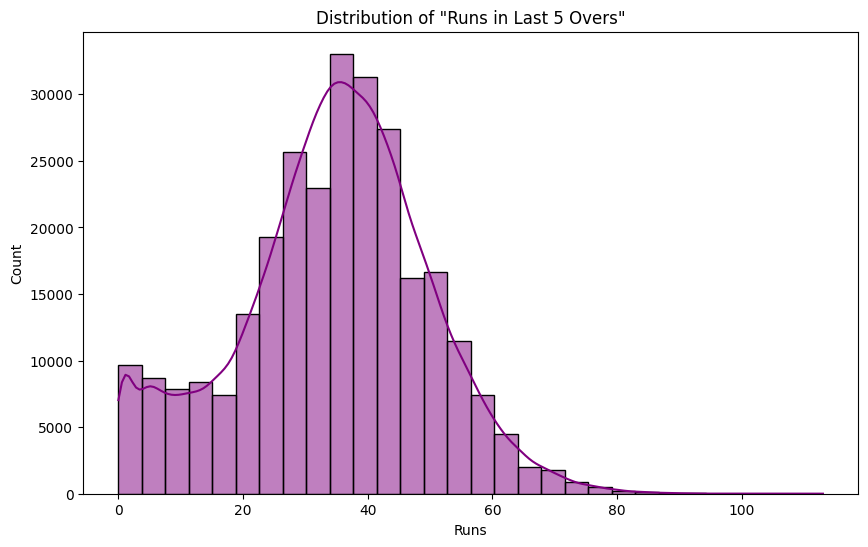

Max runs in 5 overs: 113.0


In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runs_last_5'], bins=30, kde=True, color='purple')
plt.title('Distribution of "Runs in Last 5 Overs"')
plt.xlabel('Runs')
plt.show()

# Check the extremes
print("Max runs in 5 overs:", df['runs_last_5'].max()) 
# If this is > 100, something is wrong (36 * 5 = 180 is theoretical max, but >90 is rare)

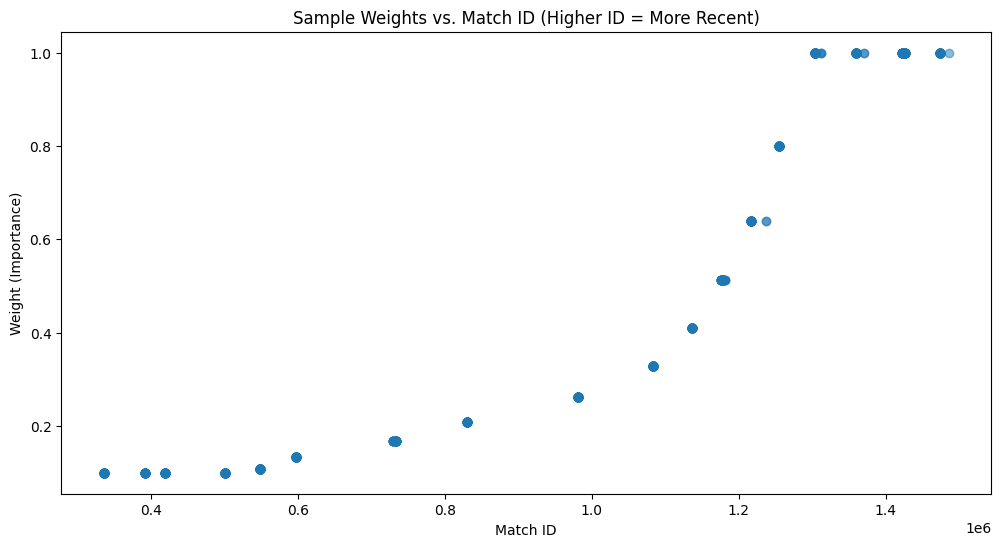

In [11]:
plt.figure(figsize=(12, 6))
# Plot sample_weight vs match_id (proxy for time)
# We take a sample of 1000 points to keep the plot fast
sample = df.sample(1000)
plt.scatter(sample['match_id'], sample['sample_weight'], alpha=0.5)
plt.title('Sample Weights vs. Match ID (Higher ID = More Recent)')
plt.xlabel('Match ID')
plt.ylabel('Weight (Importance)')
plt.show()

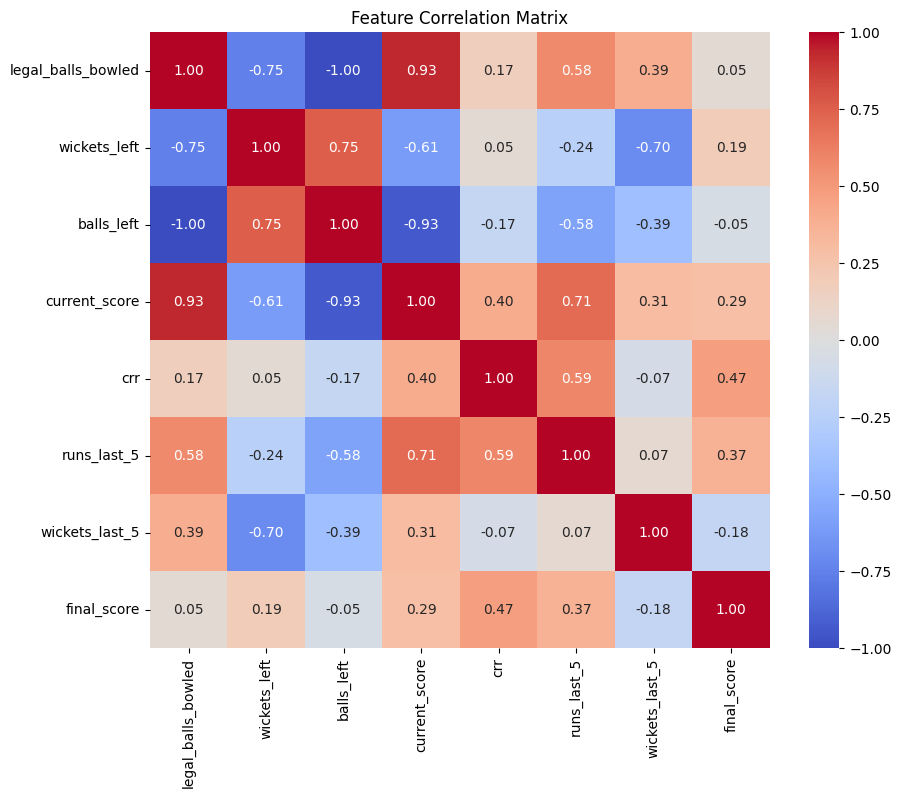

In [12]:
# Correlation Heatmap
# Filter only numeric columns
numeric_df = df[['legal_balls_bowled', 'wickets_left', 'balls_left', 
                 'current_score', 'crr', 'runs_last_5', 'wickets_last_5', 'final_score']]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# Pick a random match_id from the dataset
test_id = df['match_id'].sample(1).values[0]
subset = df[df['match_id'] == test_id]

print(f"Tracing Match ID: {test_id}")
# Show progression of the first innings
subset[subset['innings']==1][['ball', 'current_score', 'wickets_left', 'runs_last_5', 'final_score']].head(10)

Tracing Match ID: 980951


,ball,current_score,wickets_left,runs_last_5,final_score
127859,0.1,0,10,0.0,186
127860,0.2,1,10,1.0,186
127861,0.3,1,9,1.0,186
127862,0.4,2,9,2.0,186
127863,0.5,2,8,2.0,186
127864,0.6,2,8,2.0,186
127865,1.1,2,8,2.0,186
127866,1.2,3,8,3.0,186
127867,1.2,7,8,7.0,186
127868,1.3,11,8,11.0,186


In [14]:
max_momentum = df[df['runs_last_5'] == 113]

print("Match Details for Highest Momentum (113 runs in 5 overs):")
display(max_momentum[['match_id', 'venue', 'batting_team', 'bowling_team', 'innings', 'ball', 'current_score', 'final_score']])

Match Details for Highest Momentum (113 runs in 5 overs):


,match_id,venue,batting_team,bowling_team,innings,ball,current_score,final_score
132309,980987,M. Chinnaswamy Stadium,Royal Challengers Bengaluru,Gujarat Lions,1,19.4,248,248


In [18]:
print("--- Final Team List  ---")
print(sorted(pd.concat([df['batting_team'], df['bowling_team']]).unique()))

print("\n--- Final Venue List  ---")
print(sorted(df['venue'].unique()))

--- Final Team List  ---
['Chennai Super Kings', 'Deccan Chargers', 'Delhi Capitals', 'Gujarat Lions', 'Gujarat Titans', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians', 'Pune Warriors', 'Punjab Kings', 'Rajasthan Royals', 'Rising Pune Supergiants', 'Royal Challengers Bengaluru', 'Sunrisers Hyderabad']

--- Final Venue List  ---
['Arun Jaitley Stadium', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M. Chinnaswamy Stadium', 'M.Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'Maharaja Yadavindra Singh International Cricket Sta

In [21]:
venue_counts = df['venue'].value_counts()

print("--- Venue Counts ---")
try:
    count_correct = venue_counts['M. Chinnaswamy Stadium']
    print(f"M. Chinnaswamy Stadium (Correct): {count_correct}")
except KeyError:
    print("M. Chinnaswamy Stadium: 0")

try:
    count_wrong = venue_counts['M.Chinnaswamy Stadium']
    print(f"M.Chinnaswamy Stadium (Needs Fixing): {count_wrong}")
except KeyError:
    print("M.Chinnaswamy Stadium: 0")

--- Venue Counts ---
M. Chinnaswamy Stadium (Correct): 22745
M.Chinnaswamy Stadium: 0


In [2]:
import numpy as np

In [3]:
na_count = df.isnull().sum().sum()
inf_count = np.isinf(df.select_dtypes(include=np.number)).sum().sum()
print(f"\nTotal NaN values in dataset: {na_count}")
print(f"Total Inf values in dataset: {inf_count}")

if inf_count>0:
    print("Columns with Inf values:")
    inf_columns = df.columns[np.isinf(df.select_dtypes(include=np.number)).any()]
    print(inf_columns)

errors = {
    "Negative Wickets Left": (df['wickets_left'] < 0).sum(),
    "Negative Balls Left":   (df['balls_left'] < -5).sum(), # Allow small buffer for extra-long overs
    "Current > Final Score": (df['current_score'] > df['final_score']).sum(),
    "Target Score is 0":     (df['final_score'] == 0).sum()
}

for check, count in errors.items():
    print(f"{check}: {count}")

print("\n--- Data Types ---")
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()
expected_cats = ['match_id', 'venue', 'batting_team', 'bowling_team']
# If 'ball' or 'crr' shows up here, we have a problem
unexpected = [c for c in non_numeric_cols if c not in expected_cats]

if not unexpected:
    print(f"✅ Data types look correct. Categorical columns: {non_numeric_cols}")
else:
    print(f"❌ Unexpected non-numeric columns: {unexpected}")

print("-" * 30)
if na_count == 0 and inf_count == 0 and sum(errors.values()) == 0 and not unexpected:
    print("🚀 ALL SYSTEMS GO. READY FOR TRAINING!")
else:
    print("🛑 HALT. Fix the errors above before training.")


Total NaN values in dataset: 0
Total Inf values in dataset: 0
Negative Wickets Left: 0
Negative Balls Left: 0
Current > Final Score: 0
Target Score is 0: 0

--- Data Types ---
✅ Data types look correct. Categorical columns: ['venue', 'batting_team', 'bowling_team']
------------------------------
🚀 ALL SYSTEMS GO. READY FOR TRAINING!
